In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, TruncatedSVD,
                                   FastICA, MiniBatchDictionaryLearning,
                                   SparsePCA)

from sklearn.manifold import (Isomap,
                              LocallyLinearEmbedding)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.random_projection import (GaussianRandomProjection,
                                       SparseRandomProjection)

from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Parameters
dim = len(X[0])
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 0

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

In [3]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2,
                        random_state=random_state))

In [4]:
inc_pca = make_pipeline(StandardScaler(),
                        IncrementalPCA(n_components=2))

In [5]:
# kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
kpca = make_pipeline(StandardScaler(),
                     KernelPCA(kernel="cosine",
                               n_components=2,
                               gamma=None,
                               fit_inverse_transform=True,
                               random_state=random_state,
                               n_jobs=1))

In [6]:
sparsepca = make_pipeline(StandardScaler(),
                          SparsePCA(n_components=2,
                                    alpha=0.0001,
                                    random_state=random_state,
                                    n_jobs=-1))

In [7]:
SVD = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=2,
                                 algorithm='randomized',
                                 random_state=random_state,
                                 n_iter=5))

In [8]:
GRP = make_pipeline(StandardScaler(),
                    GaussianRandomProjection(n_components=2,
                                             eps = 0.5,
                                             random_state=random_state))

In [9]:
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

In [10]:
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

In [11]:
SRP = make_pipeline(StandardScaler(),
                    SparseRandomProjection(n_components=2,
                                           density = 'auto',
                                           eps = 0.5,
                                           random_state=random_state,
                                           dense_output = False))

In [12]:
isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2,
                              n_jobs = 4,
                              n_neighbors = 5))

In [13]:
miniBatchDictLearning = make_pipeline(StandardScaler(),
                                      MiniBatchDictionaryLearning(n_components=2,
                                                                  batch_size = 200,
                                                                  alpha = 1,
                                                                  n_iter = 25,
                                                                  random_state=random_state))

In [14]:
FastICA = make_pipeline(StandardScaler(),
                        FastICA(n_components=2,
                                algorithm = 'parallel',
                                whiten = True,
                                max_iter = 100,
                                random_state=random_state))

In [15]:
lle = make_pipeline(StandardScaler(),
                    LocallyLinearEmbedding(n_components=2,
                                           n_neighbors = 10,
                                           method = 'modified',
                                           n_jobs = 4,
                                           random_state=random_state))

In [16]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

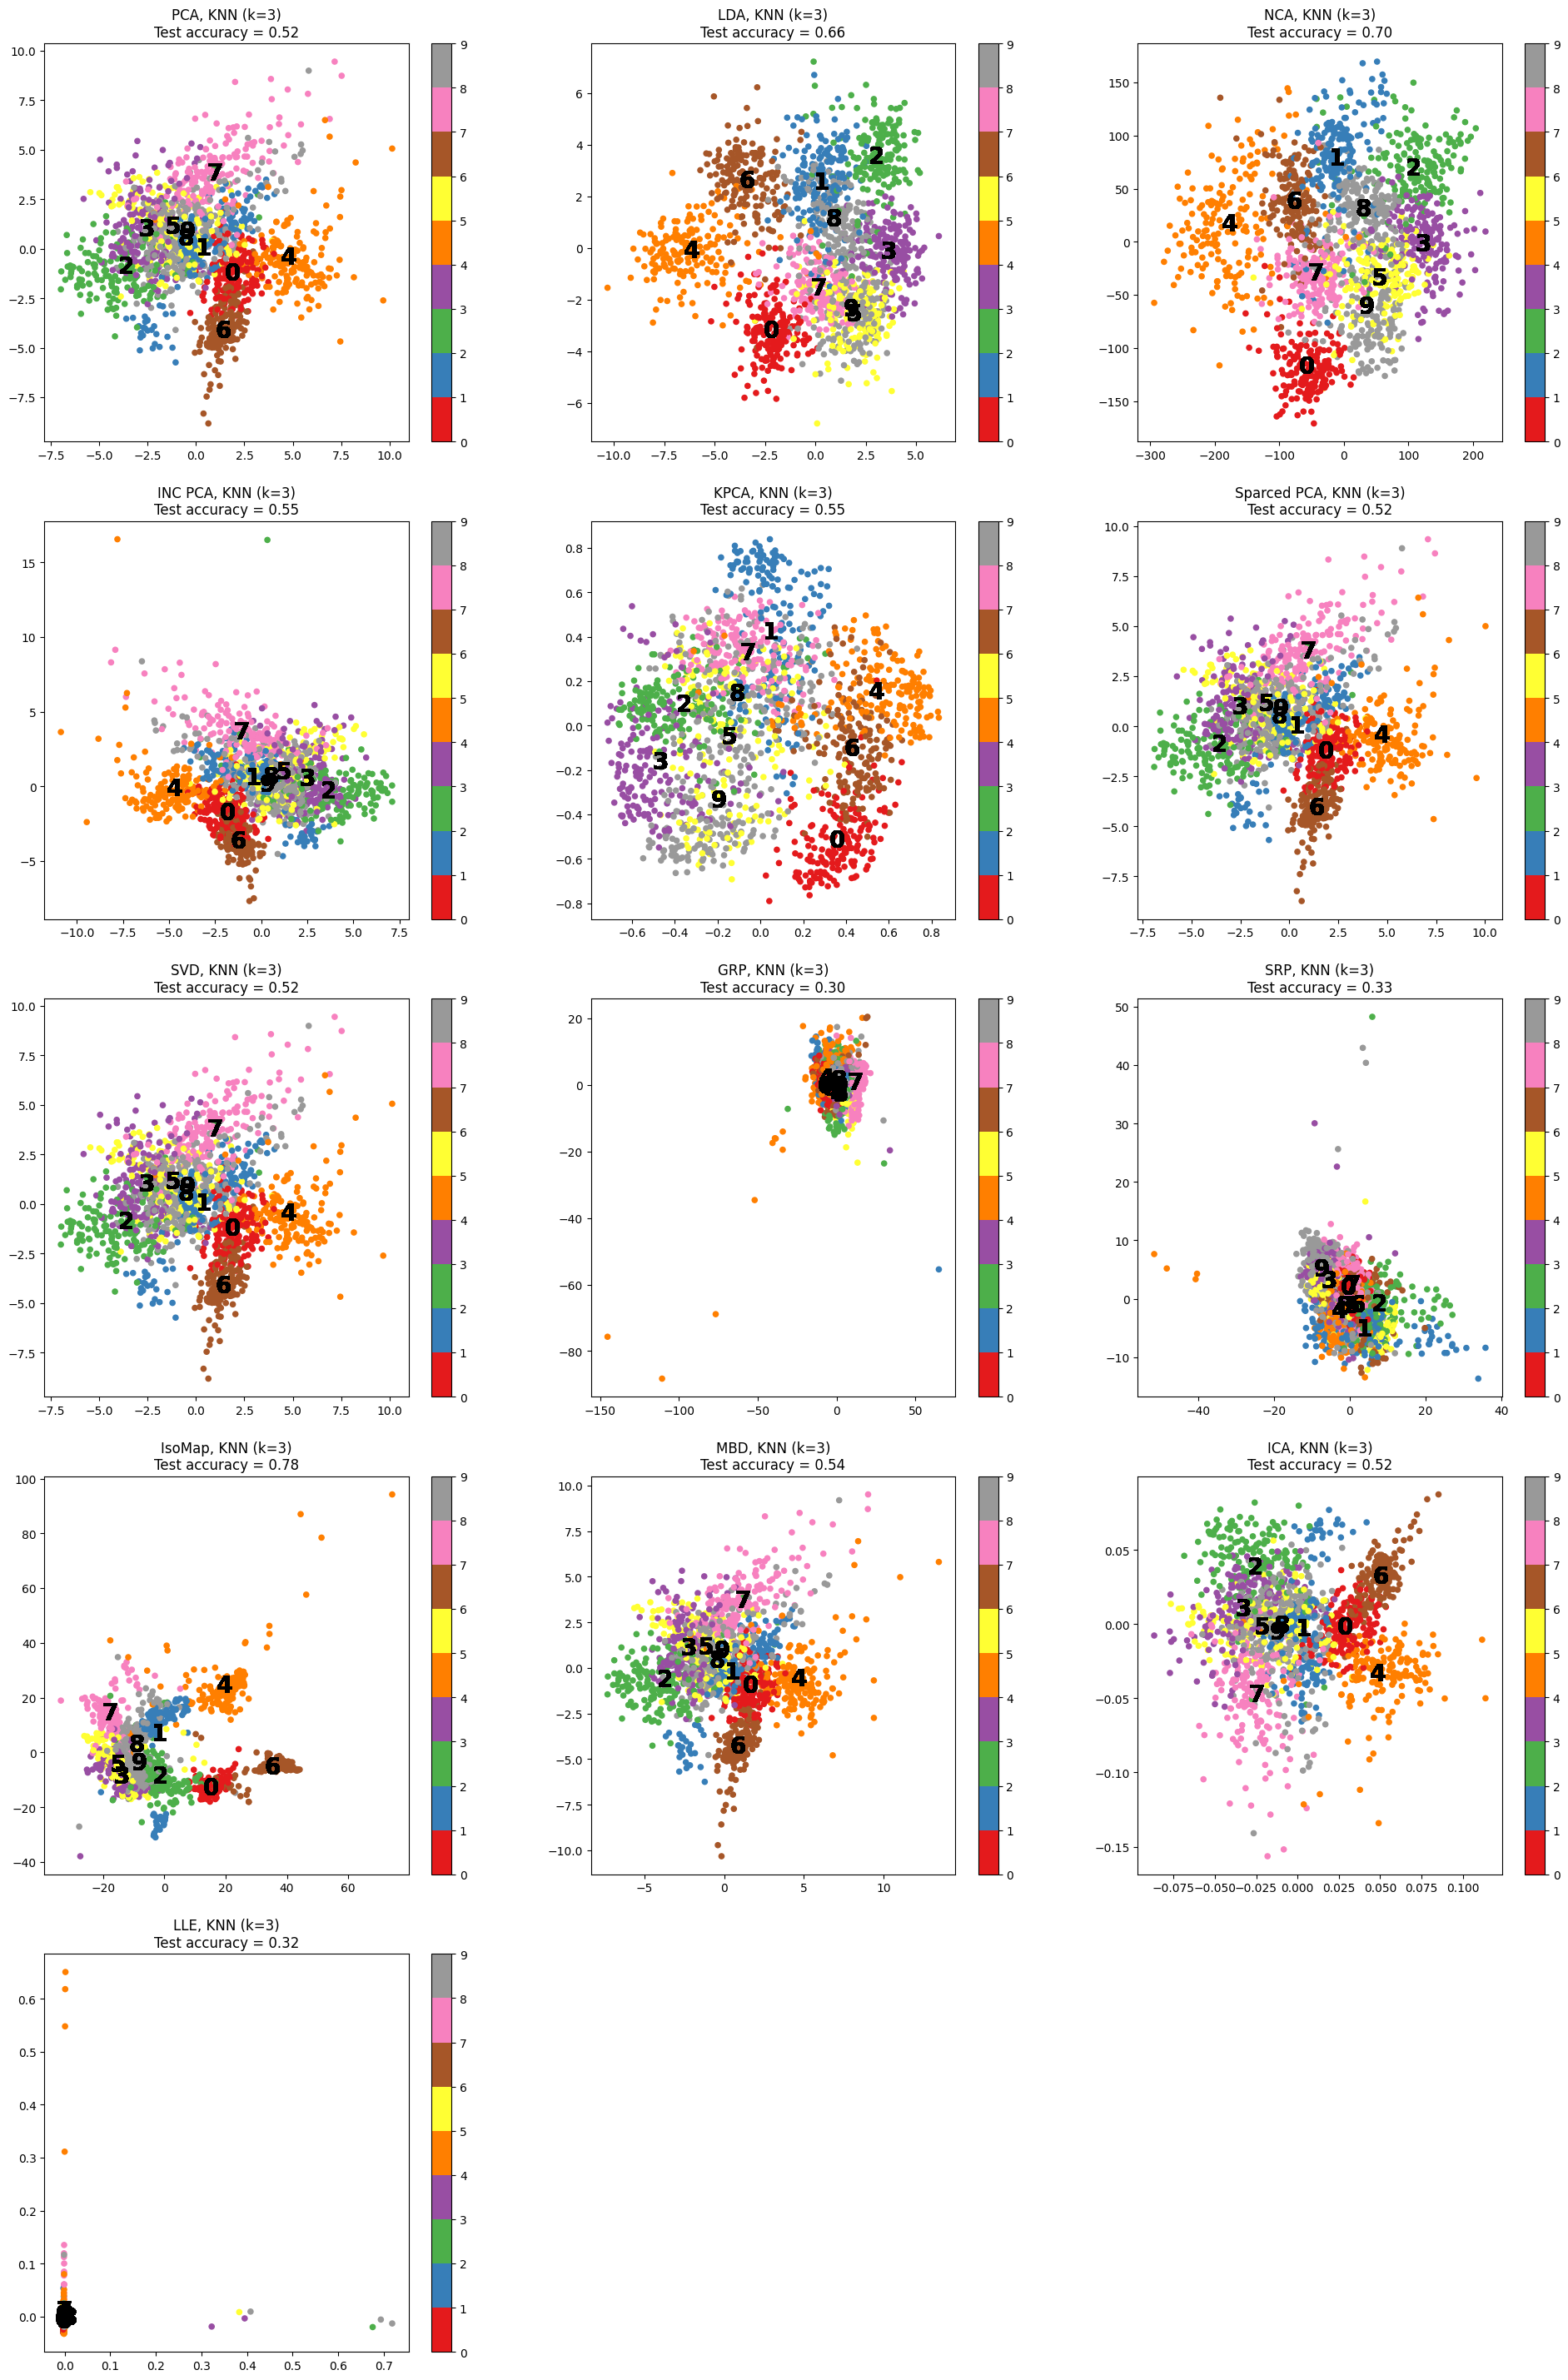

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Make a list of the methods to be compared
dim_reduction_methods = {'PCA': pca,
                         'LDA': lda,
                         'NCA': nca,
                         'INC PCA': inc_pca,
                         'KPCA':kpca,
                         'Sparced PCA': sparsepca,
                         'SVD': SVD,
                         'GRP' : GRP,
                         'SRP': SRP,
                         'IsoMap': isomap,
                         'MBD': miniBatchDictLearning,
                         'ICA': FastICA,
                         'LLE': lle}


plt.figure(figsize=(24, 36))

for j,(name, model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(5, 3, j + 1, aspect='auto')

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Fit the methods using the fitted model
    X_embedded = model.transform(X)

    # Creating a dataframe to easily plot the sample label
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis=1))

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
    plt.colorbar()

    # Label the data distributions
    for i, number in enumerate(y_test):
        plt.annotate(number,
                     df.loc[df[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20')

plt.show()